In [1]:
import numpy as np
import pandas as pd
import keras.backend as K

from keras.models import Model, Sequential
from keras import models, layers, optimizers, regularizers
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.utils.np_utils import to_categorical
from keras.engine.topology import Layer, InputSpec
from keras.callbacks import LearningRateScheduler


from sklearn.utils import shuffle
from sklearn.utils.linear_assignment_ import linear_assignment

import keras
import matplotlib.pyplot as plt
from keras import layers
from keras import backend as K

/home/dougwoodward/CADS/thesis/env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
kepler_data = pd.read_csv("kepler_data_full.csv", header=159)
kepler_data

,rowid,kepid,tce_plnt_num,tce_rogue_flag,tce_delivname,rowupdate,tce_datalink_dvs,tce_datalink_dvr,tce_period,tce_period_err,...,tce_dicco_mdec,tce_dicco_mdec_err,tce_dicco_msky,tce_dicco_msky_err,tce_dikco_mra,tce_dikco_mra_err,tce_dikco_mdec,tce_dikco_mdec_err,tce_dikco_msky,tce_dikco_msky_err
0,1,1162345,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001162/001162345/dv/kplr001162345-002-2014...,001/001162/001162345/dv/kplr001162345-20141002...,0.831850,6.693070e-05,...,0.504060,1.2900,0.507070,1.1200,-0.183490,1.2100,0.424890,1.3000,0.462820,1.1000
1,2,1292087,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001292/001292087/dv/kplr001292087-002-2014...,001/001292/001292087/dv/kplr001292087-20141002...,1.095240,1.009340e-05,...,-0.075798,0.2120,0.097899,0.2090,0.206520,0.2250,-0.077214,0.2380,0.220490,0.2200
2,3,1293031,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001293/001293031/dv/kplr001293031-002-2014...,001/001293/001293031/dv/kplr001293031-20141002...,0.719273,1.388330e-05,...,0.337380,0.2890,0.444500,0.2240,-0.308090,0.1910,0.283570,0.2240,0.418720,0.2070
3,4,1162345,3,NaN,q1_q17_dr24_tce,2015-01-15,001/001162/001162345/dv/kplr001162345-003-2014...,001/001162/001162345/dv/kplr001162345-20141002...,0.831833,9.431020e-06,...,0.167200,0.1830,0.253410,0.1970,0.087066,0.2510,0.106320,0.1720,0.137420,0.1960
4,5,1164109,1,NaN,q1_q17_dr24_tce,2015-01-15,001/001164/001164109/dv/kplr001164109-001-2014...,001/001164/001164109/dv/kplr001164109-20141002...,622.408000,8.547390e-03,...,10.358000,0.0894,15.177000,0.0893,-11.060000,0.0892,10.437000,0.0894,15.207000,0.0893
5,6,757450,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000757/000757450/dv/kplr000757450-001-2014...,000/000757/000757450/dv/kplr000757450-20141002...,8.884920,1.186150e-06,...,0.072221,0.0697,0.072362,0.0694,0.069581,0.0719,-0.103820,0.0782,0.124980,0.0763
6,7,892667,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000892/000892667/dv/kplr000892667-001-2014...,000/000892/000892667/dv/kplr000892667-20141002...,2.262110,2.726600e-05,...,0.303870,0.1920,0.411080,0.1370,0.139510,0.0883,0.115410,0.1630,0.181060,0.1240
7,8,892772,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000892/000892772/dv/kplr000892772-001-2014...,000/000892/000892772/dv/kplr000892772-20141002...,5.092600,3.144550e-05,...,-1.296300,0.1230,4.920200,0.1610,-4.962200,0.1580,-1.555100,0.1170,5.200200,0.1650
8,9,1026032,1,NaN,q1_q17_dr24_tce,2015-01-15,001/001026/001026032/dv/kplr001026032-001-2014...,001/001026/001026032/dv/kplr001026032-20141002...,8.460440,3.822250e-07,...,0.051352,0.0669,0.078983,0.0673,-0.004233,0.0737,-0.064448,0.0770,0.064587,0.0770
9,10,1026032,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001026/001026032/dv/kplr001026032-002-2014...,001/001026/001026032/dv/kplr001026032-20141002...,4.230220,7.327150e-07,...,-0.003027,0.0678,0.051184,0.0676,-0.014758,0.0716,-0.137870,0.0841,0.138650,0.0840


In [36]:
k_data = kepler_data.copy()
k_data = k_data.drop(['rowid','kepid','tce_rogue_flag', 'tce_delivname', 'rowupdate', 
                           'tce_datalink_dvs', 'tce_datalink_dvr', 'tce_steff_prov', 
                           'tce_slogg_prov', 'tce_smet_prov','tce_sradius_prov', 'tce_limbdark_mod',
                           'tce_trans_mod', 'tce_eccen', 'tce_eccen_err', 'tce_longp', 'tce_longp_err'
                          ],axis=1)
# drop some columns that we will not be using
# starting with all NA columns
k_data.dropna(axis=1,how='any', inplace=True)

# drop all autovetter columns execpt the training set - as those are manually set - take as "truth"

k_data = k_data.drop(['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp','av_vf_afp_err',
                           'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc','av_pp_afp', 
                           'av_pp_ntp', 'tce_plnt_num'],axis=1)

# update to be categorical
#k_data = pd.get_dummies(k_data, columns=['av_training_set','av_pred_class'])

# train/test split
test = k_data.loc[k_data['av_training_set'] == "UNK"] # test data is all data labeled as UNK in av_training

train = k_data[k_data.av_training_set != "UNK"] # training data is all data that is AFP/NTP/PC

# the training labels are truth
y_train = train[['av_training_set']]
y_train = pd.get_dummies(y_train)
# we cluster without labels, then we augment data w/ cluster
x_train = train.drop(['av_training_set','av_pred_class'], axis=1)
#x_train = pd.get_dummies(x_train, columns=['av_training_set'])

x_test = test.av_pred_class
x_test = test.drop(['av_training_set','av_pred_class'], axis=1)


def normalize(x):
    return (x - x.mean()) / (x.max() - x.min())
    
x_train = normalize(x_train)
y_train

,av_training_set_AFP,av_training_set_NTP,av_training_set_PC
0,1,0,0
3,1,0,0
5,0,0,1
6,0,1,0
7,1,0,0
13,1,0,0
14,1,0,0
15,1,0,0
16,1,0,0
17,1,0,0


In [4]:
# ok - so we have a basic autoencoder
# but we did not do layerwise greedy pre training
# so we need to do that layerwise greedy pretrain
layer_sizes = [x_train.shape[1],500,500,2000,10]

# creates the layers to greedy layerwise pretrain
# takes par
def create_layers(layer_sizes):
    autoencoders = []
    encoders = []
    decoders = []
    for i in range(1, len(layer_sizes)):
        if i == len(layer_sizes) - 1:
            act = 'linear'
        else:
            act = 'relu'
        h = Dense(layer_sizes[i], activation=act,
                  input_shape=(layer_sizes[i-1],),
                  name='encoder_%d'%i,
                  bias_initializer='zeros',
                  kernel_initializer=RandomNormal(mean=0.0, stddev=0.01, seed=None))
        encoders.append(h)
        
        rev_i = len(layer_sizes) - i
        if i == 1:
            act = 'linear'
        else:
            act = 'relu'
        d = Dense(layer_sizes[i-1], activation=act,
                 name='decoder_%d'%rev_i,
                 bias_initializer='zeros',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.01, seed=None))
        decoders.append(d)
        autoencoder = Sequential([
            Dropout(0.2, input_shape=(layer_sizes[i-1],),name='encoder_dropout_%d'%i),
            h,
            Dropout(0.2, name='decoder_dropout_%d'%rev_i),
            d
        ])
        autoencoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
        autoencoders.append(autoencoder)
    return autoencoders, encoders, decoders

# build up some models
autoencoders, encoders, decoders = create_layers(layer_sizes)

encoder = Sequential(encoders)
encoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
decoders.reverse()
autoencoder = Sequential(encoders + decoders)
autoencoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))


In [5]:
current_input = x_train.copy()
histories =[]

def step_decay(epoch):
    initial_lrate = 0.1
    drop_factor = int(epoch / 20000)
    lrate = initial_lrate / (10**drop_factor)
    return lrate

lr_schedule = LearningRateScheduler(step_decay)

# Greedy Layer Wise Training
for i, ae in enumerate(autoencoders):
    if i > 0:
        weights = encoders[i-1].get_weights()
        dense_layer = Dense(layer_sizes[i], input_shape=(current_input.shape[1],),
                            activation='relu', weights=weights,
                            name='encoder_dense_copy_%d'%i)
        encoder_model = Sequential([dense_layer])
        encoder_model.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
        current_input = encoder_model.predict(current_input)
    histories.append(ae.fit(current_input, current_input,
                    batch_size=256, epochs=50, callbacks=[lr_schedule]))
    
    autoencoder.layers[i].set_weights(ae.layers[1].get_weights())
    autoencoder.layers[len(autoencoder.layers)-i-1].set_weights(ae.layers[-1].get_weights())
    

Epoch 1/50
15737/15737 [==============================] - 1s 41us/step - loss: 0.0123
Epoch 2/50
15737/15737 [==============================] - 0s 9us/step - loss: 0.0120
Epoch 3/50
15737/15737 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4/50
15737/15737 [==============================] - 0s 9us/step - loss: 0.0109
Epoch 5/50
15737/15737 [==============================] - 0s 9us/step - loss: 0.0099
Epoch 6/50
15737/15737 [==============================] - 0s 9us/step - loss: 0.0085
Epoch 7/50
15737/15737 [==============================] - 0s 8us/step - loss: 0.0072
Epoch 8/50
15737/15737 [==============================] - 0s 8us/step - loss: 0.0063
Epoch 9/50
15737/15737 [==============================] - 0s 9us/step - loss: 0.0057
Epoch 10/50
15737/15737 [==============================] - 0s 8us/step - loss: 0.0053
Epoch 11/50
15737/15737 [==============================] - 0s 8us/step - loss: 0.0051
Epoch 12/50
15737/15737 [==============================] - 0s 

15737/15737 [==============================] - 0s 10us/step - loss: 7.3463e-04
Epoch 46/50
15737/15737 [==============================] - 0s 10us/step - loss: 7.1724e-04
Epoch 47/50
15737/15737 [==============================] - 0s 10us/step - loss: 7.0059e-04
Epoch 48/50
15737/15737 [==============================] - 0s 10us/step - loss: 6.8498e-04
Epoch 49/50
15737/15737 [==============================] - 0s 11us/step - loss: 6.6968e-04
Epoch 50/50
15737/15737 [==============================] - 0s 10us/step - loss: 6.5581e-04
Epoch 1/50
15737/15737 [==============================] - 0s 24us/step - loss: 0.0013
Epoch 2/50
15737/15737 [==============================] - 0s 17us/step - loss: 0.0011
Epoch 3/50
15737/15737 [==============================] - 0s 17us/step - loss: 9.4054e-04
Epoch 4/50
15737/15737 [==============================] - 0s 17us/step - loss: 8.3169e-04
Epoch 5/50
15737/15737 [==============================] - 0s 17us/step - loss: 7.5917e-04
Epoch 6/50
15737/15737 [

15737/15737 [==============================] - 0s 18us/step - loss: 1.3180e-04
Epoch 36/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3154e-04
Epoch 37/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3131e-04
Epoch 38/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3111e-04
Epoch 39/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3092e-04
Epoch 40/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3077e-04
Epoch 41/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3062e-04
Epoch 42/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3048e-04
Epoch 43/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3034e-04
Epoch 44/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3024e-04
Epoch 45/50
15737/15737 [==============================] - 0s 18us/step - loss: 1.3013e-04
Epoch 46/50

4


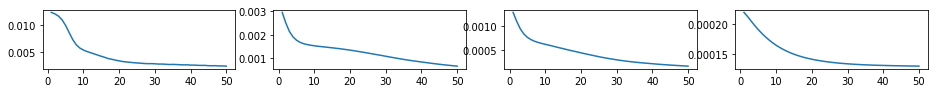

In [6]:
plt.clf()

tot = len(histories)
cols = 5
rows = tot//cols
rows += tot%cols

pos = range(1,tot+1)
print(tot)
fig = plt.figure(1, )
fig.set_figheight(5)
fig.set_figwidth(20)

for i,h in enumerate(histories):
    ax = fig.add_subplot(rows,cols,pos[i])
    loss = h.history['loss']
    epochs = range(1, len(loss)+1)
    ax.plot(epochs, loss)

plt.show()

In [7]:
history = autoencoder.fit(x_train, x_train, batch_size=256, epochs=100)

Epoch 1/100
15737/15737 [==============================] - 0s 28us/step - loss: 0.0123
Epoch 2/100
15737/15737 [==============================] - 0s 22us/step - loss: 0.0122
Epoch 3/100
15737/15737 [==============================] - 0s 22us/step - loss: 0.0121
Epoch 4/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0119
Epoch 5/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0112
Epoch 6/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0097
Epoch 7/100
15737/15737 [==============================] - 0s 22us/step - loss: 0.0088
Epoch 8/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0087
Epoch 9/100
15737/15737 [==============================] - 0s 22us/step - loss: 0.0086
Epoch 10/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0084
Epoch 11/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0083
Epoch 12/100
15737/15737 [===============

15737/15737 [==============================] - 0s 22us/step - loss: 0.0051
Epoch 95/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0051
Epoch 96/100
15737/15737 [==============================] - 0s 22us/step - loss: 0.0051
Epoch 97/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0051
Epoch 98/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0051
Epoch 99/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0051
Epoch 100/100
15737/15737 [==============================] - 0s 21us/step - loss: 0.0051


In [8]:
autoencoder.save_weights('autoencoder.h5')

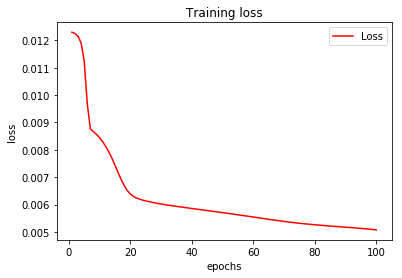

In [9]:
plt.clf()
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

In [10]:
#autoencoder.load_weights('autoencoder_smaller.h5')

In [11]:
for i,layer in enumerate(encoder.layers):
    layer.set_weights(autoencoder.layers[i].get_weights())

In [12]:
class ClusteringLayer(Layer): 
    
    def __init__(self, output_dim, input_dim=None, weights=None, alpha=1.0, **kwargs):
        self.output_dim = output_dim
        self.input_dim = input_dim
        self.alpha = alpha        
        self.initial_weights = weights
        self.input_spec = [InputSpec(ndim=2)]
        
        if self.input_dim:
            kwargs['input_shape'] = (self.input_dim,)
        super(ClusteringLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = [InputSpec(dtype=K.floatx(),
                                     shape=(None, input_dim))]
        self.W = K.variable(self.initial_weights)
        self.trainable_weights = [self.W]
        
    def call(self, x, mask=None):
        q = 1.0/(1.0 + K.sqrt(K.sum(K.square(K.expand_dims(x, 1) - self.W), axis=2))**2/self.alpha)
        q = q**((self.alpha+1.0)/2.0)
        q = K.transpose(K.transpose(q)/K.sum(q, axis=1))
        return q
    
    def get_output_shape_for(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return (input_shape[0], self.output_dim)
    
    def get_output_shape(self, input_shape):
        return self.get_output_shape(input_shape)
    
    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.output_dim
    
    def get_config(self):
        config = {'output_dim': self.output_dim,
                  'input_dim': self.input_dim}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items() + list(config.items)))
    

In [13]:
from sklearn.cluster import KMeans

cluster_centers = None
y_prediction = 0
n_clusters=3
# initialize cluster centres using k-means
print('Initializing cluster centres with k-means.')
if cluster_centers is None:
    kmeans = KMeans(n_clusters=n_clusters, n_init=20)
    y_prediction = kmeans.fit_predict(encoder.predict(x_train))
    cluster_centers = kmeans.cluster_centers_


Initializing cluster centres with k-means.


In [14]:
model = Sequential([encoder,
                    ClusteringLayer(n_clusters,
                                    weights=cluster_centers,
                                    name='clustering')])

model.compile(optimizer='adadelta',
              loss='kullback_leibler_divergence')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 10)                1318010   
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,318,040
Trainable params: 1,318,040
Non-trainable params: 0
_________________________________________________________________


In [19]:
def p_mat(q):
    weight = q**2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

labels = {"av_training_set_AFP": 0,
          "av_training_set_NTP":1,
          "av_training_set_PC":2}

def cluster_acc(y_truth, y_pred):
    yidx = y_truth.idxmax(1).values
    y_true = np.vectorize(labels.get)(yidx)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max())+1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind])*1.0/y_pred.size, w

In [21]:
batch_size = 512
y = y_train
update_interval = 10
iteration = 0
index = 0
train_dec_epochs = 2000
master_acc = []
save_interval = x_train.shape[0]/batch_size*50
print(update_interval)
# training loop
for i in range(train_dec_epochs):

    if iteration % update_interval == 0:
        q = model.predict(x_train, verbose=0)
        p = p_mat(q)
        y_pred = q.argmax(1)
        delta_label = ((y_pred != y_prediction).sum().astype(np.float32) / y_pred.shape[0])
        if y is not None:
            acc = cluster_acc(y, y_prediction)[0]
            master_acc.append(acc)
            print('Iteration '+str(i)+', Accuracy '+str(np.round(acc, 5)))
        else:
            print(str(np.round(delta_label*100, 5))+'%change in label assignment')
        print(str(np.round(delta_label*100, 5))+'%change in label assignment\n')            
        
        y_prediction = y_pred
        
    for i, layer in enumerate(encoder.layers):
        layer.set_weights(model.layers[0].layers[i].get_weights())
    cluster_centers = model.layers[-1].get_weights()[0]
    
    # cross validation
    if(index+1)*batch_size > x_train.shape[0]:
        loss = model.train_on_batch(x_train[index*batch_size::], p[index*batch_size::],
                                    p[index*batch_size::])
        index = 0
    else:
        loss = model.train_on_batch(x_train[index*batch_size:(index+1) * batch_size],
                                    p[index*batch_size:(index+1) * batch_size])
        index += 1
    
    
    iteration +=1


    

10
Iteration 0, Accuracy 0.50975
0.0%change in label assignment

Iteration 10, Accuracy 0.50975
2.89763%change in label assignment

Iteration 20, Accuracy 0.48967
2.03342%change in label assignment

Iteration 30, Accuracy 0.50442
2.40834%change in label assignment

Iteration 40, Accuracy 0.52183
6.48789%change in label assignment

Iteration 50, Accuracy 0.56834
4.15581%change in label assignment

Iteration 60, Accuracy 0.59681
8.17818%change in label assignment

Iteration 70, Accuracy 0.54038
4.61969%change in label assignment

Iteration 80, Accuracy 0.50702
0.74983%change in label assignment

Iteration 90, Accuracy 0.50207
1.08026%change in label assignment

Iteration 100, Accuracy 0.49514
1.67122%change in label assignment

Iteration 110, Accuracy 0.4837
0.34314%change in label assignment

Iteration 120, Accuracy 0.48561
1.79831%change in label assignment

Iteration 130, Accuracy 0.47341
1.46788%change in label assignment

Iteration 140, Accuracy 0.48351
1.08661%change in label assig

Iteration 1210, Accuracy 0.50931
0.07625%change in label assignment

Iteration 1220, Accuracy 0.50861
0.09532%change in label assignment

Iteration 1230, Accuracy 0.50823
0.1398%change in label assignment

Iteration 1240, Accuracy 0.50912
0.08261%change in label assignment

Iteration 1250, Accuracy 0.50969
0.13344%change in label assignment

Iteration 1260, Accuracy 0.50893
0.1398%change in label assignment

Iteration 1270, Accuracy 0.50804
0.1398%change in label assignment

Iteration 1280, Accuracy 0.50886
0.09532%change in label assignment

Iteration 1290, Accuracy 0.50848
0.19063%change in label assignment

Iteration 1300, Accuracy 0.50702
0.01271%change in label assignment

Iteration 1310, Accuracy 0.50702
0.23511%change in label assignment

Iteration 1320, Accuracy 0.50855
0.21605%change in label assignment

Iteration 1330, Accuracy 0.5102
0.11438%change in label assignment

Iteration 1340, Accuracy 0.50925
0.26053%change in label assignment

Iteration 1350, Accuracy 0.50753
0.184

In [37]:
# add the predicted class to the training set
dec_prediction = model.predict(x_train, verbose=0)
print(dec_prediction)
# we will append all three cluster assignment probs[]

x_train['dec_pred_AFP'] = dec_prediction[:,0]
x_train['dec_pred_NTP'] = dec_prediction[:,1]
x_train['dec_pred_PC'] = dec_prediction[:,2]

# use a basic feed forward neural net to classify


[[0.00897663 0.01024142 0.9807819 ]
 [0.0085873  0.00984322 0.9815694 ]
 [0.9839564  0.00754857 0.008495  ]
 ...
 [0.00843572 0.00966104 0.9819032 ]
 [0.98409665 0.0074656  0.0084377 ]
 [0.9841088  0.00745956 0.00843161]]


In [ ]:
from sklearn.decomposition import PCA
df = X.copy()

labels = {"AFP": 0,
          "NTP":1,
          "PC":2}

int_labels = np.vectorize(labels.get)(kepler_data['av_pred_class'])
df['labels'] = int_labels

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
from ggplot import *

chart = ggplot( df, aes(x='pca-one', y='pca-two', color='labels') ) \
        + geom_point(size=7,alpha=0.8) \
        + ggtitle("First and Second Principal Components")
chart

In [ ]:
df.columns